# Part II - Visualizing FordGoBike  System Data
## by Justina Akweley Ayittah

>It is quite normal for people within the age group of 25 -35 patronise Ford Bike Share most since they are mostly energic.

>The analysis and visualisations reveal that people irrespective of age, gender prefer to just be customers other than subscribers.

>> It is interesting to know that females go on longer trips than males. Also, one will think a bike share system will be patronised more by tourists more but the analysis shows that since the rides are rented out most withing the rush hours of getting to work and departure, workers tend to patronise the system most.


## Investigation Overview
> In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system. 

> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.


## Dataset Overview

> > Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. 
>The dataset includes information about individual rides made in the bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df_clean_ford= pd.read_csv('df_cleaned.csv')
df_clean_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_time_weekday,start_time_month_num,end_time_weekday,start_time_hour,end_time_hour,duration_min,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,True,35,Thu,2,Fri,17.0,8,869,February,March
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,True,47,Thu,2,Fri,12.0,5,1030,February,March
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,True,30,Thu,2,Fri,17.0,4,608,February,March
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,True,45,Thu,2,Fri,23.0,0,26,February,March
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,True,60,Thu,2,Fri,23.0,0,29,February,March


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Week
>Thursdays seem to be the most patronised day followed by Tuesday. Also, Wednesday and Tuesday also have a significant number of bike trips. However bike trips are low on Saturdays and Sundays. This be concluded that the GoBike system is mostly used by workers to commute to work.

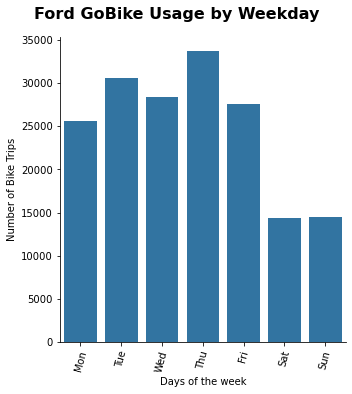

In [7]:
no_color = sb.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df_clean_ford, x='start_time_weekday', kind='count', color = no_color, order = weekday)

graph.set_axis_labels('Days of the week', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

## Ford GoBike Usage by Age
>The majority of the system users fall between the ages of 20 - 40 years with the highest users between 25 - 35 years. Again majority of working class fall between the ages of 20 to 40.

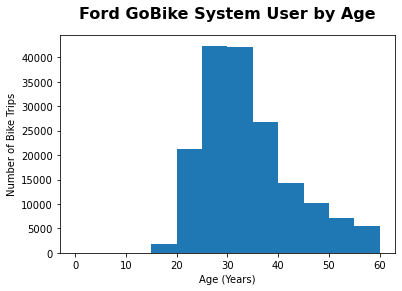

In [8]:
# plotting age data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_clean_ford, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Bike Trips');

## Ford GoBike Gender vrs user type.
> Males tend to Subcribe to the Subscriber service than the females. Nonetheless, more females tend to be subcribers than the males who prefer to be just customers.

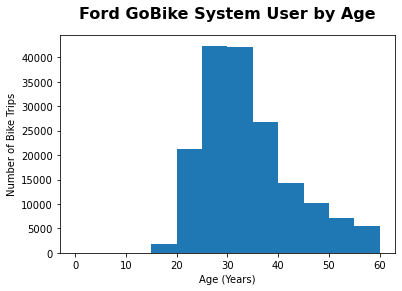

In [9]:
# plotting age data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_clean_ford, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Bike Trips');

### The relationship between days of the week, duration of trips and user type
> Sunday and Saturday are the busiest travel days, there is a correlation between subscription days and customer days. Customer duration seconds, however, are higher than subscriber duration seconds

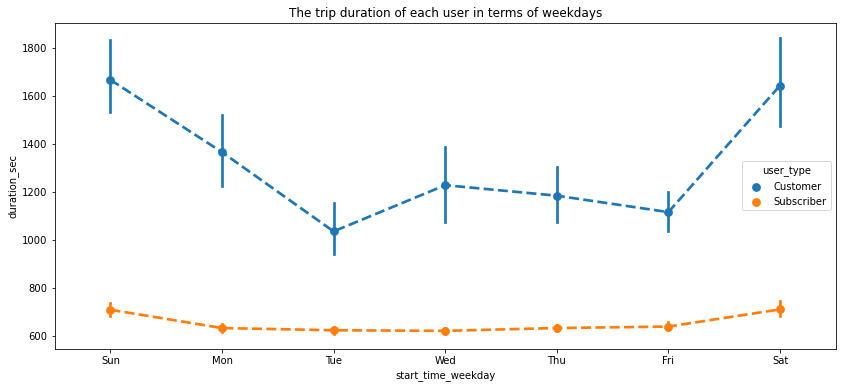

In [10]:
order_day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
def graph_user(n,xvar, yvar, cvar, graph):
    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sb.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=order_day)     
    else:
        plt.figure(figsize=(14,6))
        graph = sb.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
         
    plt.title('The trip duration of each user in terms of weekdays')
graph_user(df_clean_ford, 'start_time_weekday', 'duration_sec', 'user_type', 'line')

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt